In [ ]:
!pip install newspaper3k

In [ ]:
!pip install lxml_html_clean

In [ ]:
!pip install newspaper3k[lxml]

In [ ]:
!pip install newspaper3k lxml_html_clean

In [ ]:
# Install necessary libraries
!pip install transformers nltk scikit-learn pandas matplotlib seaborn newspaper3k

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


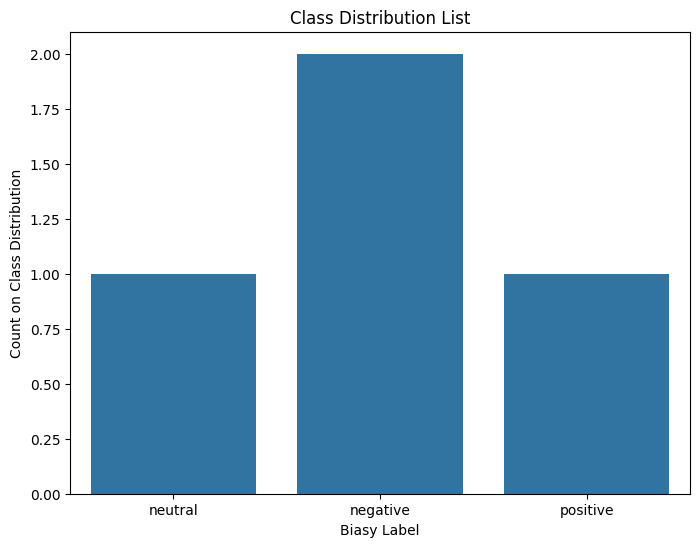

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


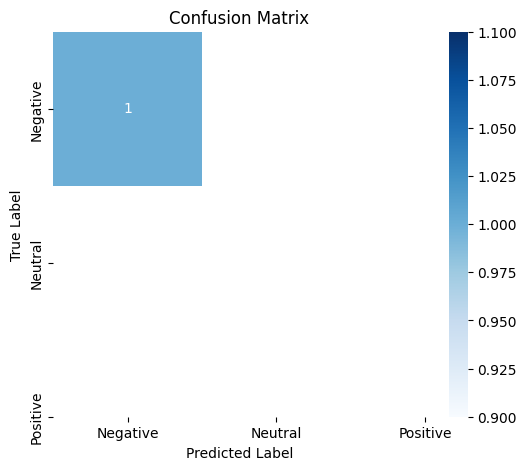

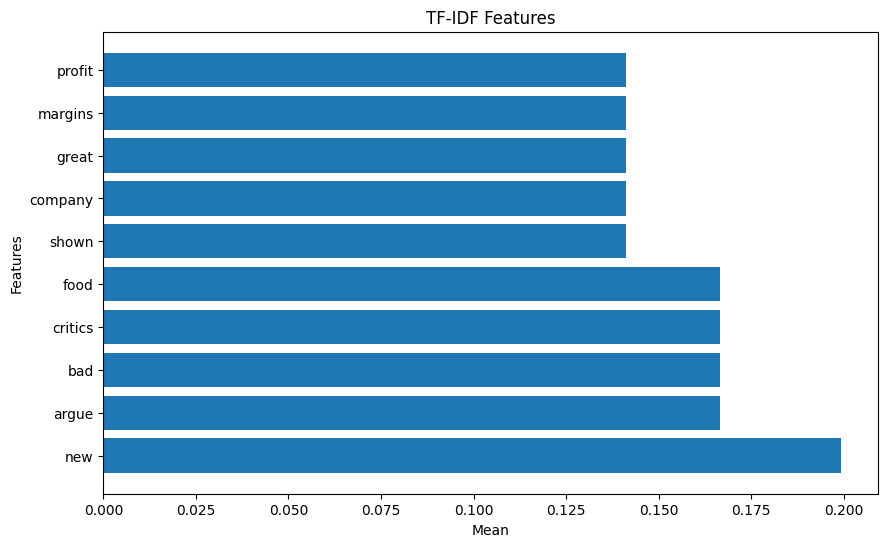

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from transformers import pipeline
from newspaper import Article
import nltk
import re
from sklearn.model_selection import train_test_split

# Downloads NLTK data to give us stop words that can be removed from data to prevent noise
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

# Processing Function to remove extra noise
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters to accomodate for extra noise
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces to accomodate for extra noise
    text = text.lower()  # make all of the text to lower to prevent capitalization issues
    text = ' '.join(word for word in text.split() if word not in stop_words)  # removes the stopwords
    return text

# Sample data from articles along with label. More data = more accuracy
data = pd.DataFrame({
    'article': [
        "The government has launched new form of pizza boxes as regulations states.",
        "The opposition criticized the North Korean politics as unhumane.",
        "The company is doing great with the new profit margins being shown.",
        "Critics argue that the food is bad."
    ],
    'bias_label': ['neutral', 'negative', 'positive', 'negative']
})

# Preprocessing Articles
data['processed_text'] = data['article'].apply(preprocess_text)

# Visualization: Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='bias_label', data=data)
plt.title('Class Distribution List')
plt.xlabel('Biasy Label')
plt.ylabel('Count on Class Distribution')
plt.show()

# Split Data two sets, train and test
X = data['processed_text']
y = data['bias_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF vecotrizer and putting them in an array
tf = TfidfVectorizer(max_features=5000)
X_train_tf = tf.fit_transform(X_train).toarray()
X_test_tf = tf.transform(X_test).toarray()

# Train model
model = LogisticRegression()
model.fit(X_train_tf, y_train)

# Evaulate the model
y_pred = model.predict(X_test_tf)
print("Report for Classification:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
confusion_matrices = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrices, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix given from data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Important TF-IDF Features
feature_importance = np.mean(X_train_tf, axis=0)
features = tf.get_feature_names_out()
sorted_indices = np.argsort(feature_importance)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.barh(np.arange(10), feature_importance[sorted_indices])
plt.yticks(np.arange(10), np.array(features)[sorted_indices])
plt.title('TF-IDF Features')
plt.xlabel('Mean')
plt.ylabel('Features')
plt.show()

In [22]:
# Function to Scrape and Predict Bias of a Website
def analyze_website(url):
    try:
        # Scrape the Article
        article = Article(url)
        article.download()
        article.parse()
        content = article.text

        # Preprocess and Predict Bias
        processed = preprocess_text(content)
        vectorized = tfidf.transform([processed]).toarray()
        prediction = model.predict(vectorized)
        return {
            'url': url,
            'title': article.title,
            'content': content[:500],  # Display the first 500 characters of the content
            'predicted_bias': prediction[0]
        }
    except Exception as e:
        return {'url': url, 'error': str(e)}

# Prompt User for URLs
user_input = input("Enter an article: ")
urls = [url.strip() for url in user_input.split(',')]

# Analyze Each URL
results = []
for url in urls:
    result = analyze_website(url)
    results.append(result)

# Display the Results
for result in results:
    if 'error' not in result:
        print(f"\nThe URL that was inputted: {result['url']}")
        print(f"Title of the given Article: {result['title']}")
        print(f"Bias Analysis Result based on prediction: {result['predicted_bias']}")
        print(f"Preview of the article for the first 500 articles: {result['content']}")
    else:
        print(f"\nError analyzing {result['url']}: {result['error']}")

Enter an article: https://www.cnn.com/2024/12/17/business/honda-nissan-merger-talks/index.html

The URL that was inputted: https://www.cnn.com/2024/12/17/business/honda-nissan-merger-talks/index.html
Title of the given Article: Honda and Nissan are in merger talks
Bias Analysis Result based on prediction: neutral
Preview of the article for the first 500 articles: CNN —

Honda and Nissan are discussing a possible merger, potentially bringing together two Japanese automaking titans that have recently fallen on hard times.

The companies said in statement that they have been in talks, but they offered no details or timeframe for when a deal – if one should develop – may be completed. It’s also not clear what shape the possible joint-venture could take. Nikkei first reported the news of a potential tie-up Tuesday.

“As announced in March, Honda and Nissan ar
